## Solutions exercises large classes (Week_02)

## Libraries and Settings

In [1]:
# Libraries
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

# Settings
import warnings
warnings.filterwarnings("ignore")

# Get current working directory
print(os.getcwd())

/workspaces/data_analytics/WTYK/LC_02


### BigmacPrice.csv

In [11]:
# Read data to data frame
df = pd.read_csv('BigmacPrice.csv', encoding='utf-8')

# Print header
print(df.head())

# Show data types
print('\n', df.dtypes)

# Show type of 'df'
print('\n', type(df))

         date currency_code       name  local_price  dollar_ex  dollar_price
0  2000-04-01           ARS  Argentina         2.50          1          2.50
1  2000-04-01           AUD  Australia         2.59          1          2.59
2  2000-04-01           BRL     Brazil         2.95          1          2.95
3  2000-04-01           GBP    Britain         1.90          1          1.90
4  2000-04-01           CAD     Canada         2.85          1          2.85

 date              object
currency_code     object
name              object
local_price      float64
dollar_ex          int64
dollar_price     float64
dtype: object

 <class 'pandas.core.frame.DataFrame'>


### ChickenData.xlsx

In [3]:
# Read data to data frame
df = pd.read_excel('ChickenData.xlsx', sheet_name='Sheet1')

# Print header
print(df.head())

# Show data types
print('\n', df.dtypes)

# Show type of 'df'
print('\n', type(df))

# Create dictionary from the data frame with breed (keys) and eggs_per_year (values)
result_dict = df.groupby('breed')['eggs_per_year'].apply(list).to_dict()

print(result_dict)

   chicken_id       weight              breed  eggs_per_year
0           1  2728.854920  New Hampshire Red            158
1           2  2323.761365         Australorp            273
2           3  2635.062034  New Hampshire Red            153
3           4  2603.985152      Plymouth Rock            268
4           5  3079.394487         Australorp            360

 chicken_id         int64
weight           float64
breed             object
eggs_per_year      int64
dtype: object

 <class 'pandas.core.frame.DataFrame'>
{'Australorp': [273, 360, 185, 257, 346, 270, 295, 256, 212, 207, 253, 276, 322, 252, 275, 175, 362, 287, 185, 261, 258, 156, 213], 'Barnevelder': [317, 169, 161, 361, 266, 319, 184, 287, 347, 359, 303, 186, 266, 192, 233, 212, 287, 173, 335, 351, 316], 'ISA Brown': [299, 210, 317, 277, 286, 188, 263, 289, 234, 217, 192, 150, 162, 225], 'New Hampshire Red': [158, 153, 275, 240, 246, 265, 233, 190, 318, 283, 190, 219, 273, 277, 299, 266, 264, 283, 158, 297], 'Plymouth Rock':

### Cars_autoscout24.csv

In [18]:
# Linux commands to get/set encoding of file (run in terminal)
# file -i Cars_autoscout24.csv
# --> provides 'charset=unknown-8bit'
# --> download the file and open with e.g. Notepad++ (on Windows)
# --> shows ANSI which is "windows-1252" (see https://de.wikipedia.org/wiki/Windows-1252)

# Convert to UTF-8, if needed, otherwise, use encoding='cp1252' in pd.read_csv
# iconv -f "windows-1252" -t "UTF-8" Cars_autoscout24.csv -o Cars_autoscout24_utf8.csv

# Read the data
df = pd.read_csv('Cars_autoscout24.csv', sep=";", encoding='cp1252')

# Function to extract numerical values from the price column
def extract_numerical_value(price):
    # Use regex to extract numerical values
    match = re.search(r"(\d+\'\d+)", price)
    if match:
        # Remove the thousands separator and convert to integer
        return float(match.group().replace("'", ''))
    else:
        return None

# Apply the function to the 'Price' column and create a new column 'Price_numeric'
df['Price_numeric'] = df['Price'].apply(extract_numerical_value)

# Display the DataFrame
df


,Offer_Id,Type,Price,PS,Init_Regist,Kilometer,Fuel_Type,Transmission,Price_numeric
0,7324420,AUDI A5 Sportback 3.0 TDI quattro S-tronic (Li...,CHF 22'500.–,245 PS,10.2014,75'000 km,Diesel,Automatisiertes Schaltgetriebe,22500.0
1,7512768,MERCEDES-BENZ SLK 200 7G-Tronic (Cabriolet),CHF 23'749.–,184 PS,6.2013,46'655 km,Benzin,Automat sequentiell,23749.0
2,7512034,MERCEDES-BENZ C 350 Avantgarde 4Matic 7G-Troni...,CHF 18'500.–,306 PS,6.2011,138'955 km,Benzin,Automat sequentiell,18500.0
3,7512728,MERCEDES-BENZ A 45 AMG 4Matic Speedshift 7G-DC...,CHF 36'000.–,360 PS,8.2015,43'000 km,Benzin,Automatisiertes Schaltgetriebe,36000.0
4,7490242,AUDI A5 Sportback 2.0 TFSI Sport quattro S-tro...,CHF 48'500.–,252 PS,9.2018,43'300 km,Benzin,Automatisiertes Schaltgetriebe,48500.0
...,...,...,...,...,...,...,...,...,...
3975,7137137,FERRARI F360 Spider (Cabriolet),CHF 58'400.–,400 PS,2.2002,78'000 km,Benzin,Automatisiertes Schaltgetriebe,58400.0
3976,6758841,MERCEDES-BENZ SL 500 560 SL (Cabriolet),CHF 15'900.–,232 PS,1.1987,315'000 km,Benzin,Automatik-Getriebe,15900.0
3977,7461330,MERCEDES-BENZ CL 63 AMG 7G-Tronic (Coupé),CHF 42'000.–,525 PS,8.2007,85'000 km,Benzin,Automat sequentiell,42000.0
3978,7005403,BMW 328i Cabrio (Cabriolet),CHF 9'980.–,193 PS,8.1995,188'920 km,Benzin,Schaltgetriebe manuell,9980.0


### Histogram of car prices

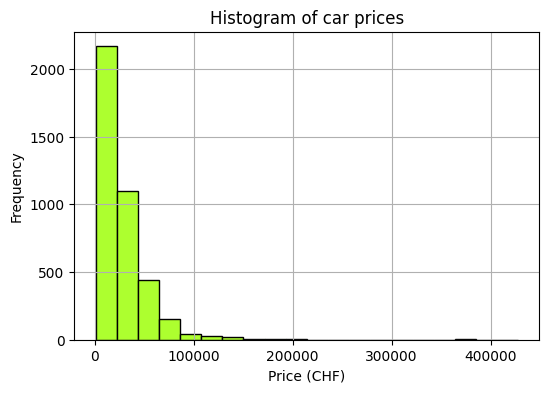

In [5]:
# Plotting the histogram with car prices
plt.figure(figsize=(6,4))
plt.hist(df['Price_numeric'], bins=20, color='greenyellow', edgecolor='black')
plt.xlabel('Price (CHF)')
plt.ylabel('Frequency')
plt.title('Histogram of car prices')
plt.grid()
plt.show()

Offer_Id         0
Type             0
Price            0
PS               0
Init_Regist      0
Kilometer        0
Fuel_Type        0
Transmission     0
Price_numeric    8
dtype: int64